In [2]:
from tropycal import realtime

In [3]:
realtime_obj = realtime.Realtime(jtwc=True, jtwc_source='ucar')

--> Starting to read in current storm data
--> Completed reading in current storm data (176.38 seconds)


In [4]:
active_storms = realtime_obj.list_active_storms()
active_storms

['AL952023', 'EP112023', 'WP992023']

Possible issue encountered when converting Shape #1 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #1 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


<GeoAxes: title={'left': 'Summary & NHC 7-Day Formation Outlook', 'right': 'Valid: 06 UTC 05 Sep 2023'}>

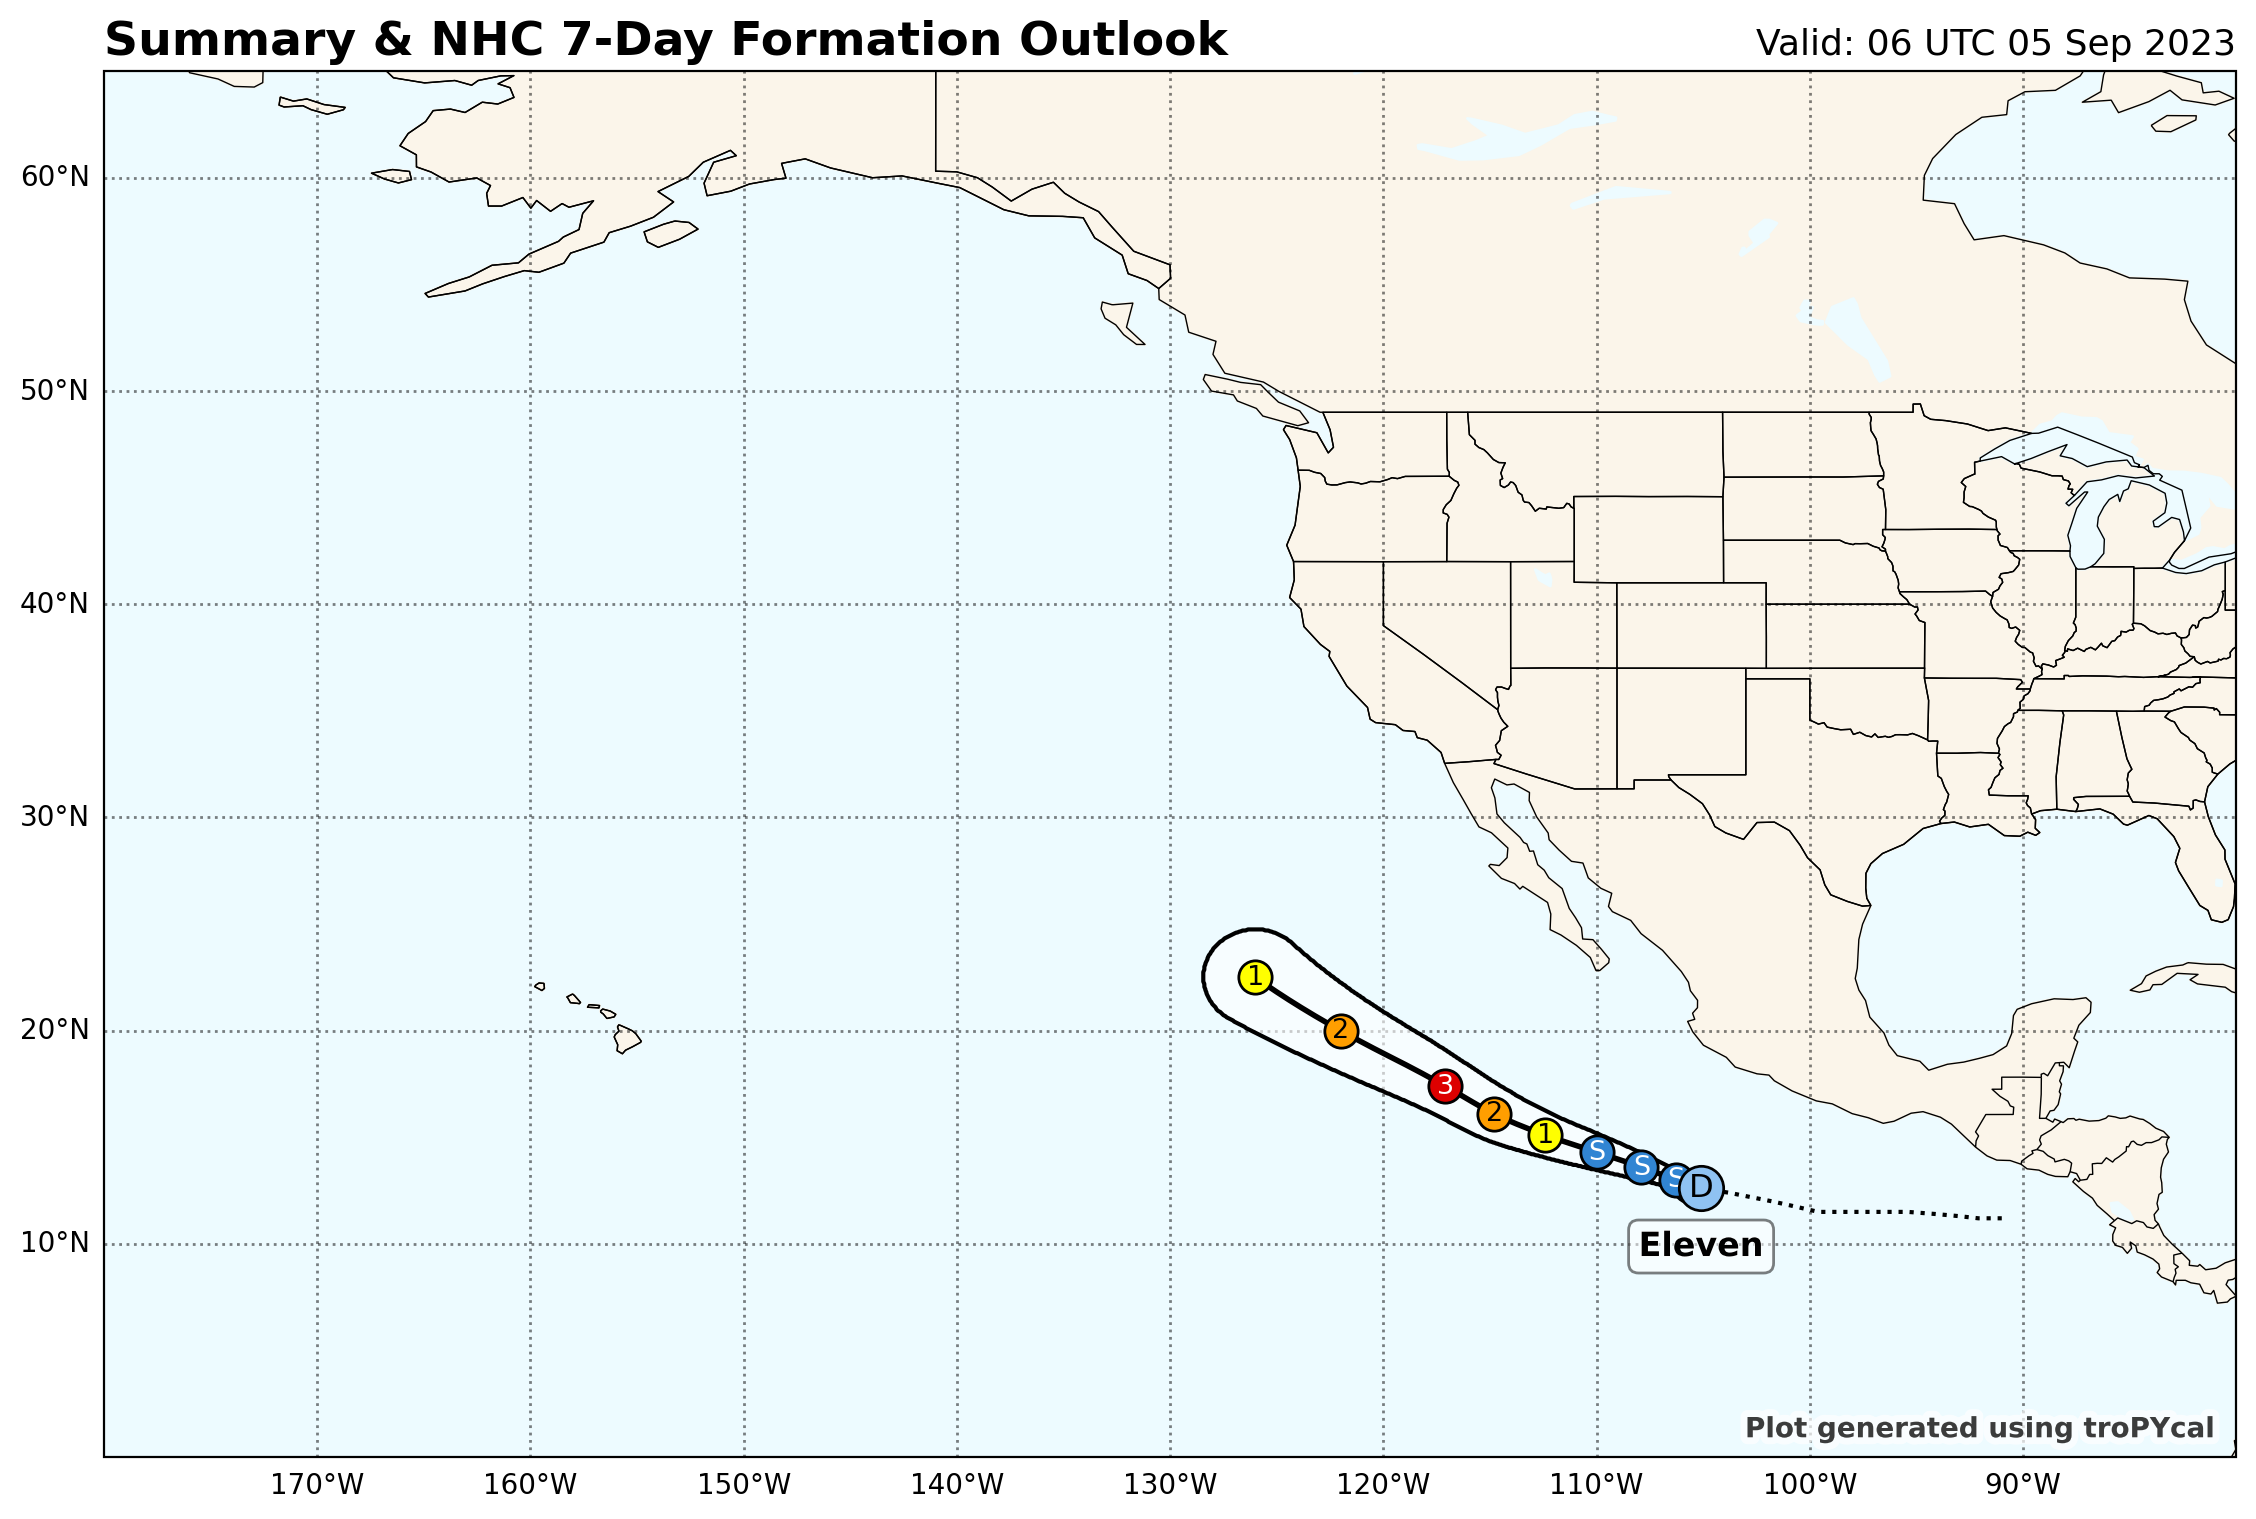

In [42]:
realtime_obj.plot_summary(domain='east_pacific')

Possible issue encountered when converting Shape #1 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #1 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


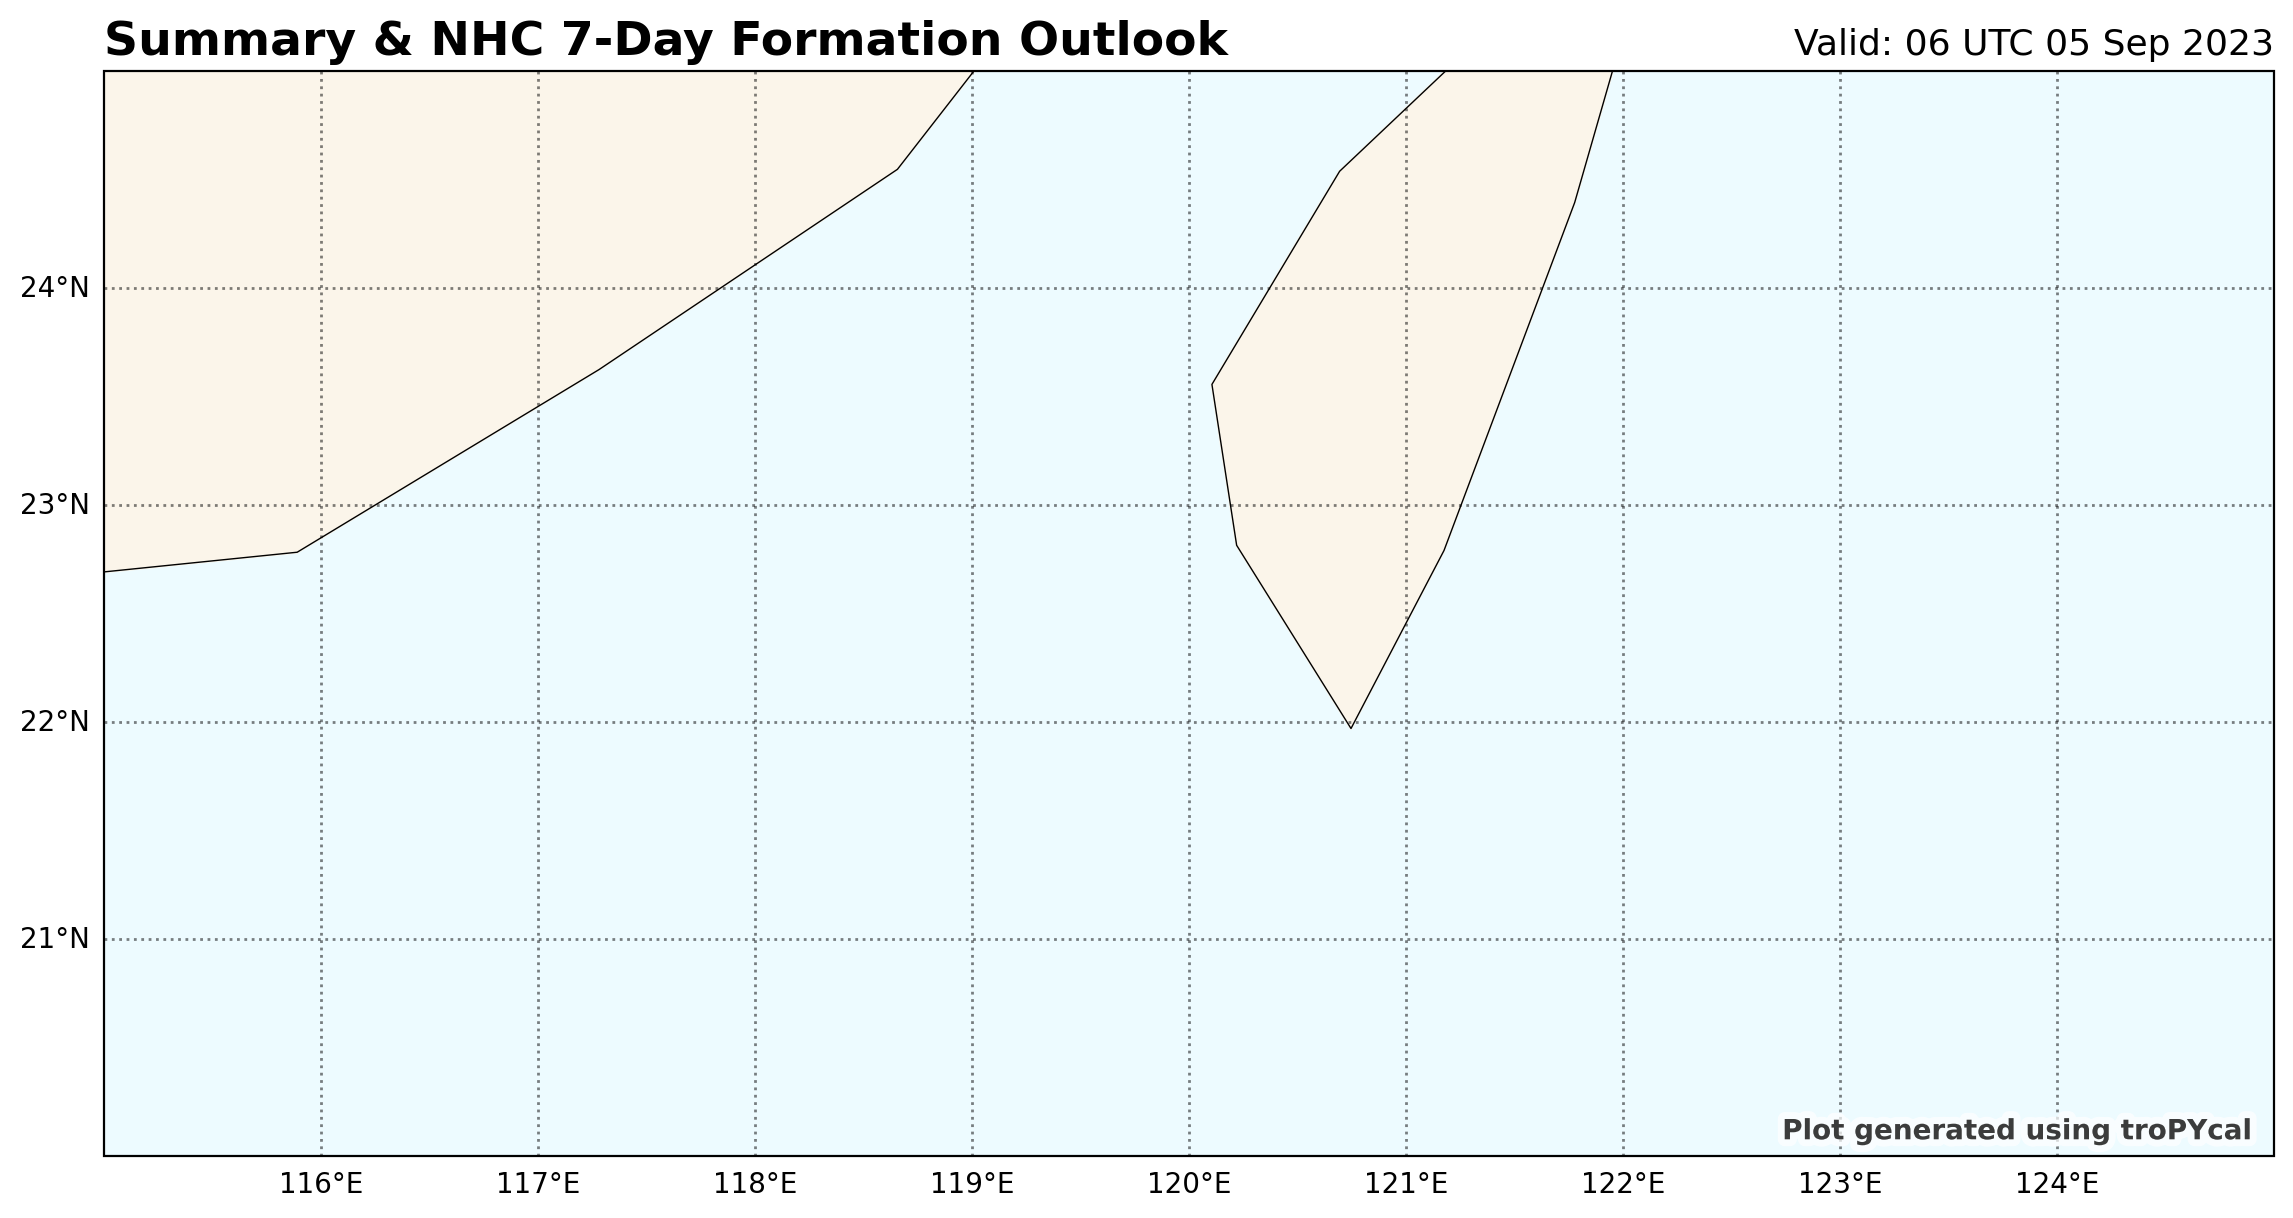

In [5]:
tw_domain = {'w':115,'e':125,'s':20,'n':25}
p = realtime_obj.plot_summary(domain=tw_domain)

In [10]:
storm = realtime_obj.get_storm(active_storms[1])

In [11]:
storm['lat'].tolist()

[11.2,
 11.2,
 11.3,
 11.4,
 11.5,
 11.5,
 11.5,
 11.5,
 11.8,
 12.0,
 12.2,
 12.4,
 12.6,
 12.7]

In [12]:
storm_forecast = storm.get_forecast_realtime(ssl_certificate=False)

In [13]:
lats = storm['lat'].tolist() + storm_forecast['lat']
lons = storm['lon'].tolist() + storm_forecast['lon']

storm_s = min(lats) - 5
storm_n = max(lats) + 5
storm_w = max(lons) + 5
storm_e = min(lons) - 5
storm_box = (storm_w, storm_e, storm_s, storm_n)
storm_box

(-86.0, -132.5, 6.199999999999999, 27.5)

In [14]:
storm['lat']

array([11.2, 11.2, 11.3, 11.4, 11.5, 11.5, 11.5, 11.5, 11.8, 12. , 12.2,
       12.4, 12.6, 12.7])

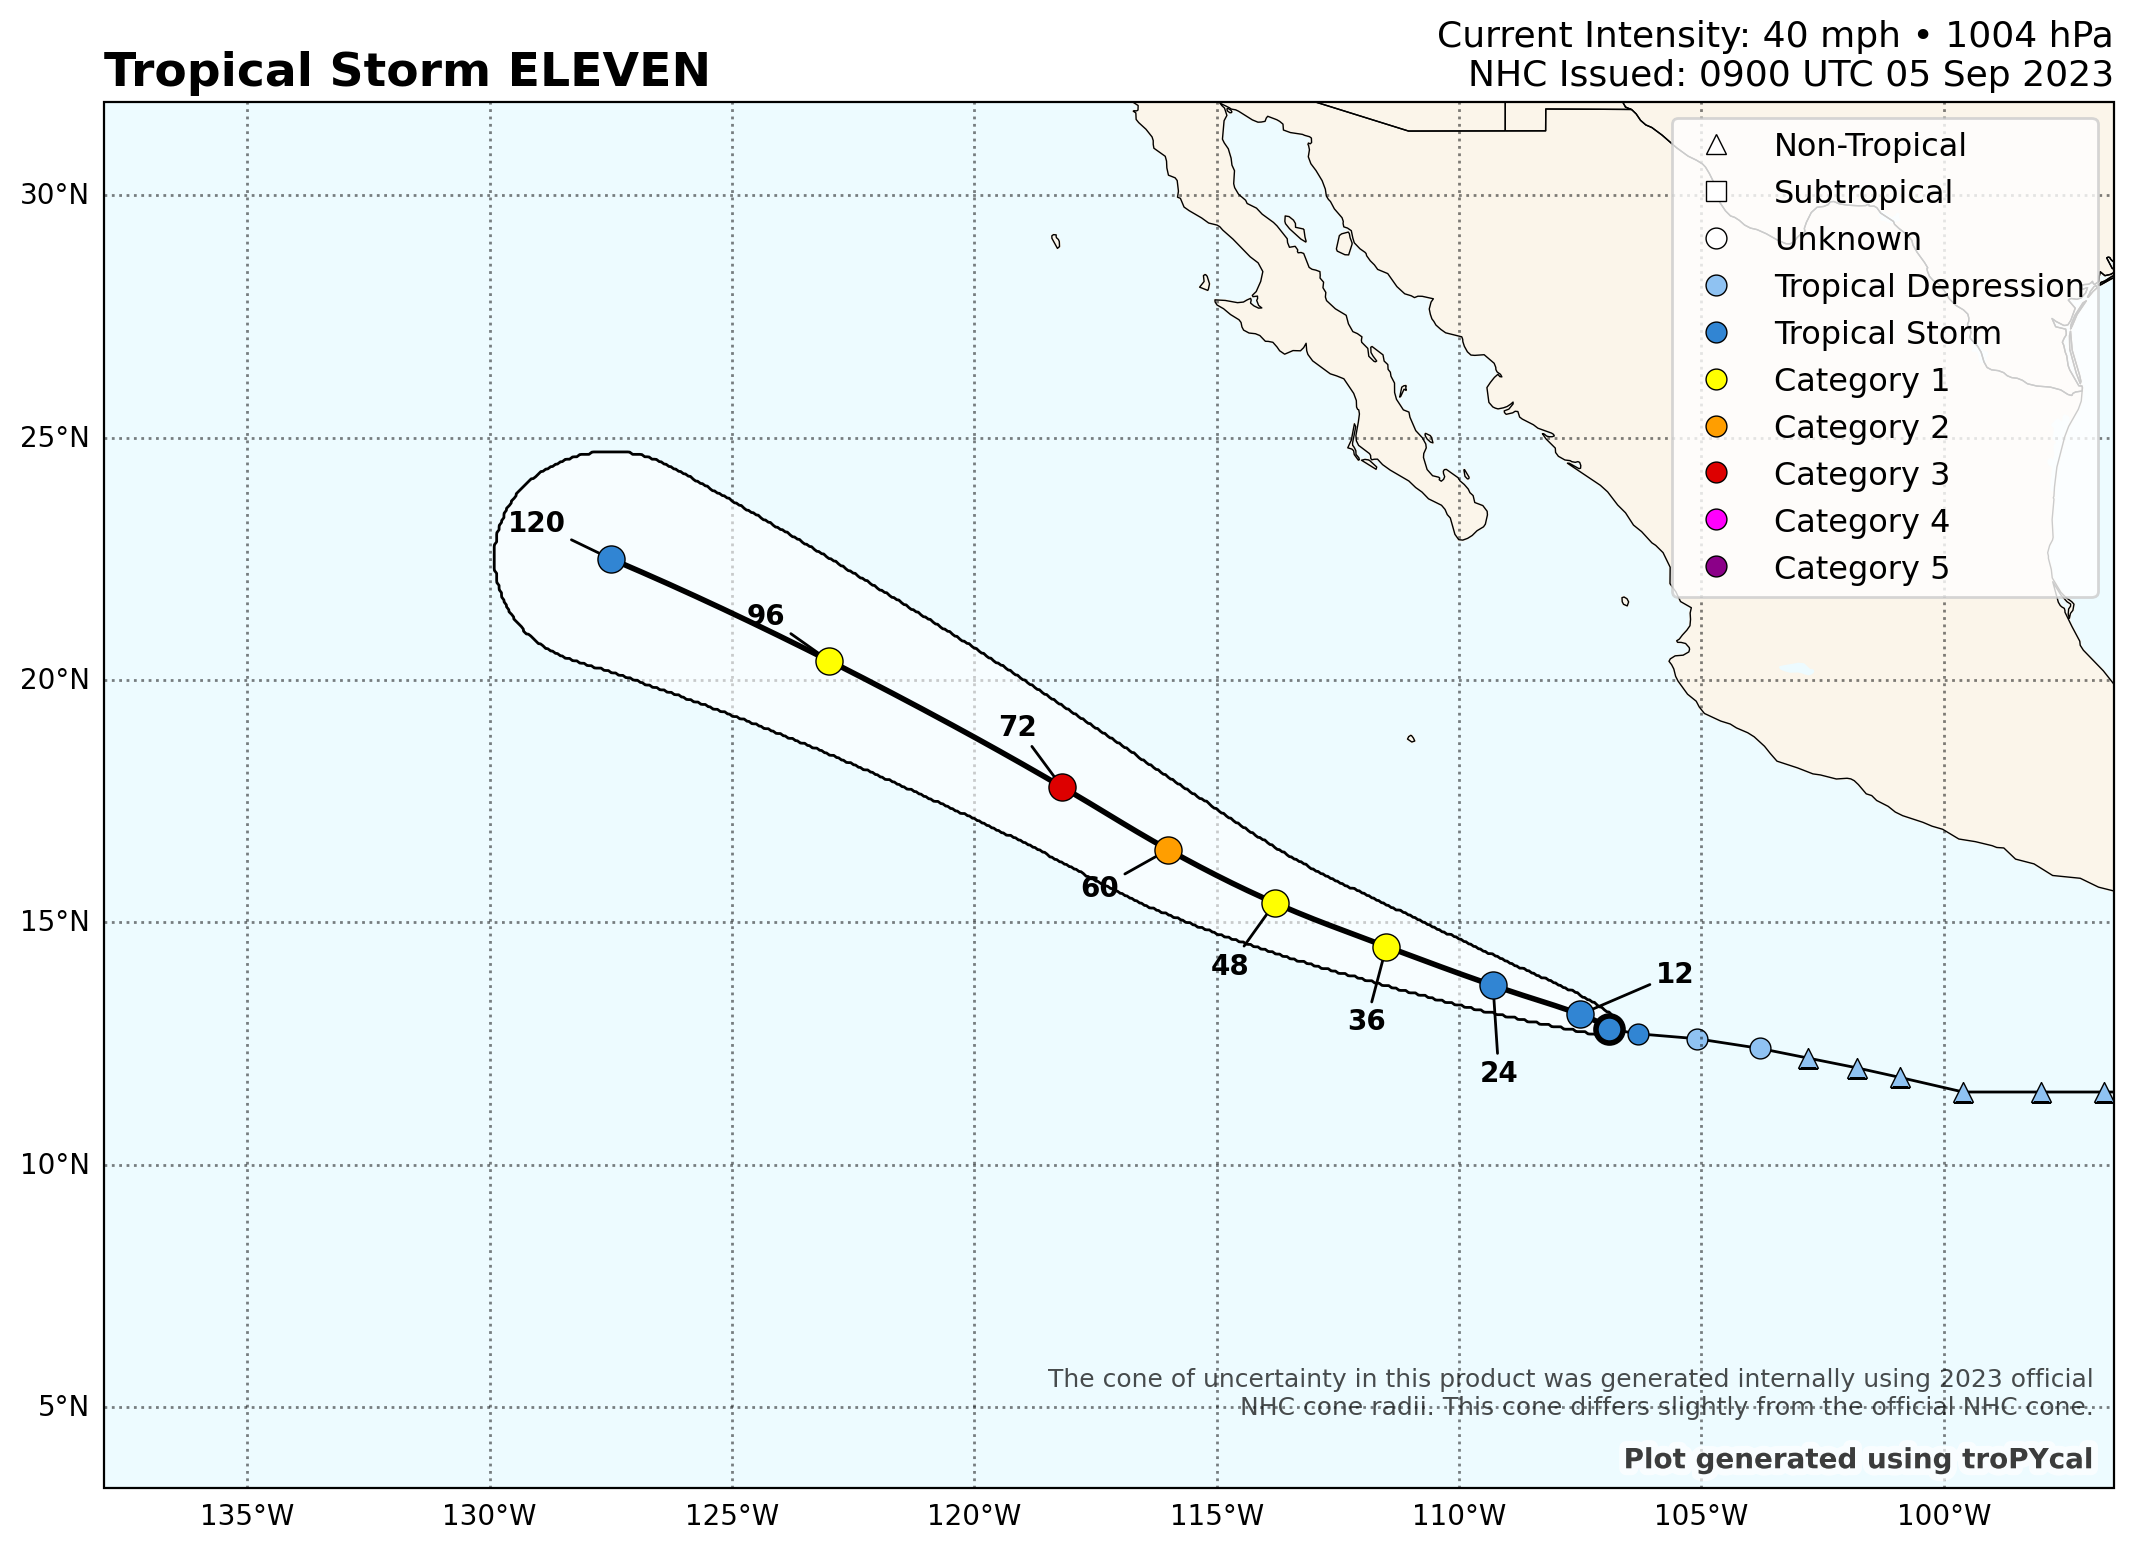

In [15]:
a = storm.plot_forecast_realtime(ssl_certificate=False)

In [10]:
import datetime as dt
from tropycal import tracks, utils
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

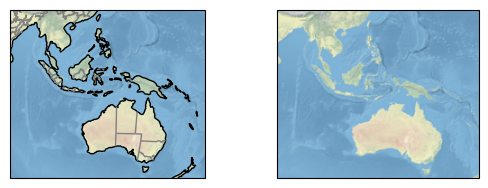

In [197]:
water_color= '#d5f0ff'
land_color = '#fcf3e8'
land_scale = '50m'


# Put a background image on for nice sea rendering.
# ax.stock_img()
from matplotlib.offsetbox import AnchoredText
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
def main():
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 1,projection=ccrs.Orthographic(central_latitude=-8, central_longitude=125))
    ax1.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())
    #ax = plt.axes(projection=ccrs.Orthographic())
    ax2 = fig.add_subplot(2, 2, 2,projection=ccrs.PlateCarree())
    ax2.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())


    # Put a background image on for nice sea rendering.
    ax1.stock_img()
    ax2.stock_img()


    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(states_provinces, edgecolor='gray')

    # Add a text annotation for the license information to the
    # the bottom right corner.
    text = AnchoredText('\u00A9 {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=4, prop={'size': 12}, frameon=True)
    #ax1.add_artist(text)

    plt.show()

main()

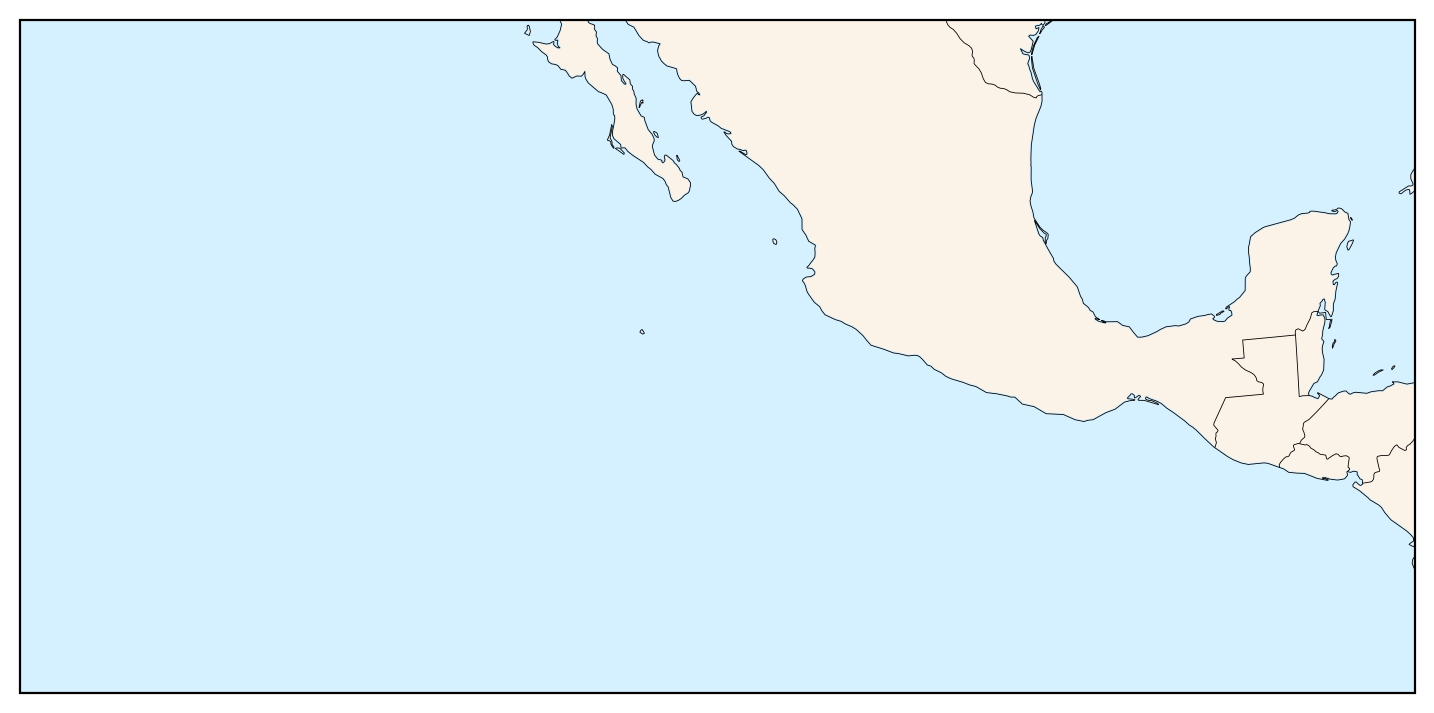

In [198]:
# Create an instance of figure and axes
fig = plt.figure(figsize=(9,6),dpi=200)
central_lon = (storm_box[0] + storm_box[1])/2
central_lat = (storm_box[2] + storm_box[3])/2

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=central_lon, central_latitude=central_lat))
land_scale = '50m'

# Plot coastlines and political boundaries
#ax.add_feature(cfeature.STATES.with_scale('50m'), linewidths=0.5, linestyle='solid', edgecolor='k')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidths=0.3, linestyle='solid', edgecolor='k')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidths=0.3, linestyle='solid', edgecolor='k')

#ax.stock_img()

# Fill in continents in light gray
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor=land_color, edgecolor='face')
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor=water_color, edgecolor='face')

# ax.add_feature( cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale=land_scale,
#                                         edgecolor='face',
#                                          facecolor=cfeature.COLORS['land'])
#                                             )


# Zoom in over the Gulf Coast
ax.set_extent(storm_box, crs=ccrs.PlateCarree())

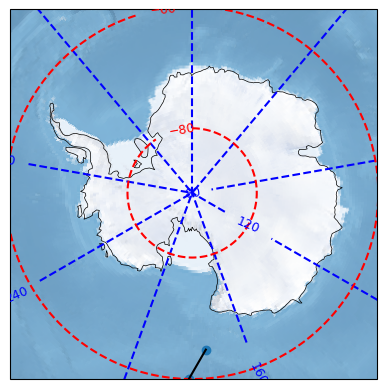

In [122]:
import numpy as np
def workaround_gridlines(src_proj, labels=True):
    # Workaround for plotting lines of constant latitude/longitude as gridlines
    # labels not supported for this projection.
    lats = np.linspace(-90, 90, num=181, endpoint=True)
    lons = np.linspace(0, 360, num=360, endpoint=False)

    yn = np.zeros(len(lats))
    lona = lons + yn.reshape(len(lats),1)
    cs2 = plt.contour(lons, lats, lona, 10, transform=src_proj, colors='b', linestyles='dashed')
    plt.clabel(cs2, fontsize=9, inline=True)

    yt = np.zeros(len(lons))
    lata = lats.reshape(len(lats),1) + yt
    cs = plt.contour(lons, lats, lata, 10, transform=src_proj, colors='r', linestyles='dashed')
    plt.clabel(cs, fontsize=9, inline=True)


def main():
    trgt_proj = ccrs.Orthographic(central_latitude=-90)
    src_proj = ccrs.PlateCarree()
    src_crs = ccrs.Geodetic()

    ax = plt.axes(projection=trgt_proj)
    ax.stock_img()

    ln = np.array([-179, 175])
    lt = np.array([-60, -65])

    # Plot gridlines
    workaround_gridlines(src_proj)

    ax.set_extent((ln.min(), ln.max(), lt.min(), lt.max()), crs=src_proj)
    ax.coastlines(resolution='110m', color='black', linewidth=0.5, zorder=1)

    plt.plot(ln, lt, '-k', transform=src_crs)
    plt.scatter(x=ln, y=lt, transform=src_crs)

    plt.show()
main()